In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Будем учиться классифицировать жанры музыки, полузуюсь не аудио дорожками, а уже осмысленными признаками (правда, не все из них имеют понятные названия). Сами данные можно найти [здесь](https://www.kaggle.com/purumalgi/music-genre-classification). Будем использовать файл `train.csv`. Нашей задачей будет предсказание переменной `Class` (жанр песни) при помощи деревьев решений. Можно попробовать также другие методы классификации, которые мы прошли, и сравнить результаты. При обучении всех моделей не забывайте про разделение на тренировку и тест (или кросс валидацию [ссылка](https://www.youtube.com/watch?v=fSytzGwwBVw)).

### Задание 1. EDA (10 баллов)

Как обычно, начнем с того, что посмотрим на наши данные: типы переменных, пропущенные значения, баланс классов и все такое. Ваш ход:

In [5]:
data = pd.read_csv("train.csv")
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [6]:
data.dtypes

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object

In [15]:
categorial = ['key', 'mode', 'time_signature']
data = data.drop(columns=['Artist Name', 'Track Name'])

In [43]:
data.isna().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

<Axes: >

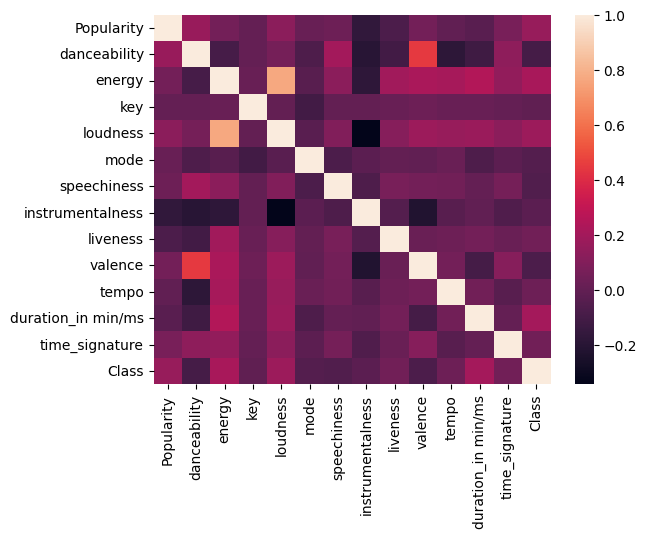

In [23]:
sns.heatmap(data.corr())

In [24]:
data = data.drop(columns=['instrumentalness', 'acousticness'])

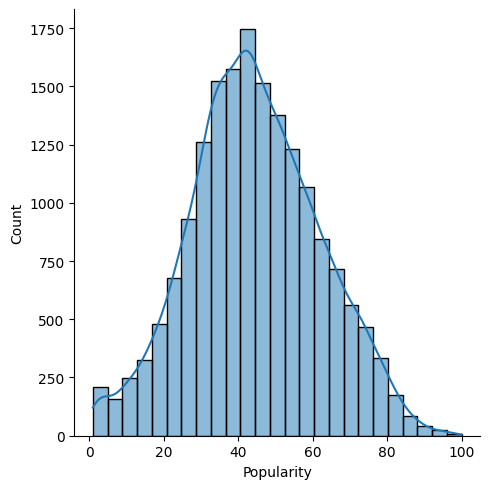

In [32]:
sns.displot(data.Popularity, kde=True, bins=25)

In [ ]:
sns.displot(data.Popularity, kde=True, bins=25)

In [39]:
data['Popularity'] = data['Popularity'].fillna(value=data.Popularity.mean())

In [42]:
data['key'] = data['key'].fillna(method='bfill')

In [48]:
data.drop(columns=categorial).describe()

,Popularity,danceability,energy,loudness,speechiness,liveness,valence,tempo,duration_in min/ms,Class
count,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000
mean,0.439516,0.543433,0.662777,0.775688,0.079707,0.196170,0.486208,0.492705,0.135896,6.695821
std,0.173924,0.166268,0.235373,0.098026,0.083576,0.159212,0.240195,0.158256,0.075812,3.206073
min,0.000000,0.059600,0.000020,0.000000,0.022500,0.011900,0.018300,0.000000,0.000000,0.000000
25%,0.323232,0.432000,0.509000,0.736292,0.034800,0.097500,0.297000,0.369604,0.112604,5.000000
50%,0.434343,0.545000,0.700000,0.797347,0.047400,0.129000,0.481000,0.479016,0.141593,8.000000
75%,0.555556,0.659000,0.860000,0.841576,0.083000,0.258000,0.672000,0.596237,0.170926,10.000000
max,1.000000,0.989000,1.000000,1.000000,0.955000,1.000000,0.986000,1.000000,1.000000,10.000000


In [47]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
data[['Popularity', 'loudness', 'tempo', 'duration_in min/ms']] = mms.fit_transform(data[['Popularity', 'loudness', 'tempo', 'duration_in min/ms']])

In [49]:
data

,Popularity,danceability,energy,key,loudness,mode,speechiness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0.595960,0.854,0.564,1.0,0.847024,1,0.0485,0.0849,0.8990,0.553969,0.158812,4,5
1,0.535354,0.382,0.814,3.0,0.792166,1,0.0406,0.1010,0.5690,0.459689,0.170413,4,10
2,0.343434,0.434,0.614,6.0,0.765439,1,0.0525,0.3940,0.7870,0.626804,0.074240,4,6
3,0.656566,0.853,0.597,10.0,0.809161,0,0.0555,0.1220,0.5690,0.409271,0.117769,4,5
4,0.525253,0.167,0.975,2.0,0.863607,1,0.2160,0.1720,0.0918,0.901766,0.155674,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,0.343434,0.166,0.109,7.0,0.553223,0,0.0413,0.0984,0.1770,0.754740,0.130958,3,6
17992,0.262626,0.638,0.223,11.0,0.720895,0,0.0329,0.0705,0.3350,0.227225,0.174024,4,2
17993,0.333333,0.558,0.981,4.0,0.853826,0,0.0712,0.6660,0.2620,0.398391,0.146374,4,8
17994,0.282828,0.215,0.805,6.0,0.658363,0,0.1340,0.2560,0.3550,0.539476,0.148724,4,8


### Задание 2. Обучение дерева решений (10 баллов)

Предобработайте признаки так, чтобы их можно было подать в модель дерева решений и обучите ее, постарайтесь подобрать оптимальные гиперпараметры, которые вам известны. Постарайтесь также обосновать выбор метрики в данном случае. При подборе гиперпараметров может помочь `GridSearchCV` [ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV
X, y = data.drop(columns = ['Class']), data['Class']


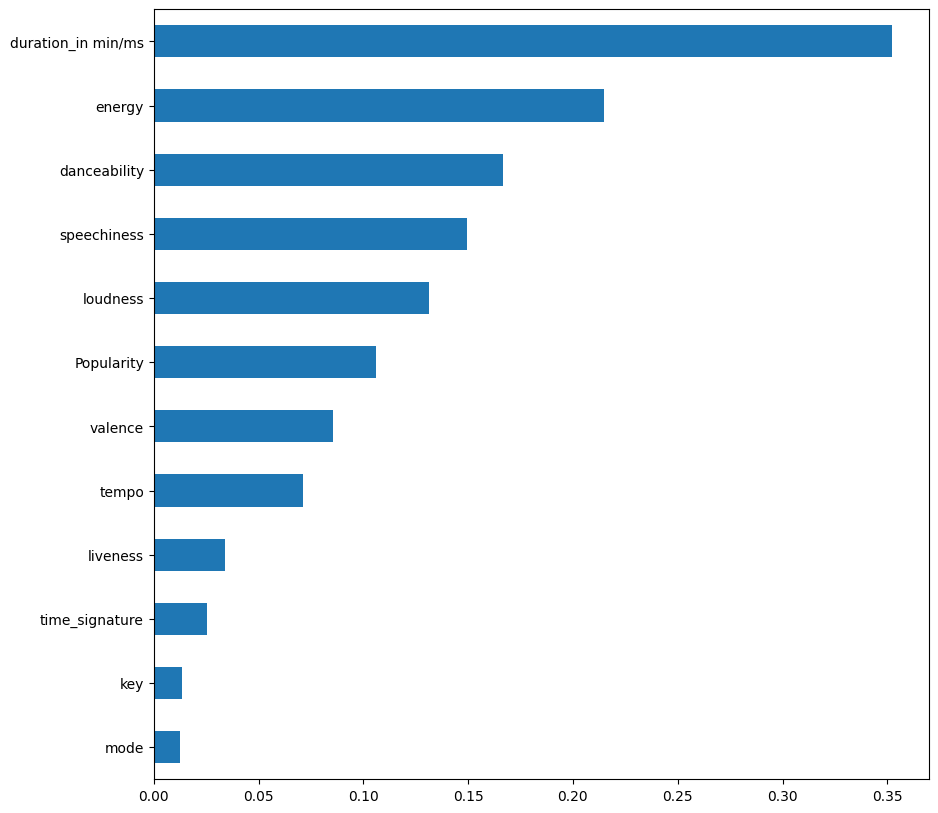

In [52]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X, y)
f_i = pd.Series(importances, X.columns[0:len(X.columns)])
f_i = f_i.sort_values()

plt.figure(figsize=(10, 10))
f_i.plot(kind='barh')
plt.show()



In [55]:
new_feachures = f_i[f_i>0.02].index
X = X[new_feachures]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
params = {'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth': range(5, 13),
          'min_samples_split': range(2, 10, 2),
          'min_samples_leaf': range(2, 7, 2)}

clf = DecisionTreeClassifier()
gs = GridSearchCV(clf, params, cv=5)

gs.fit(X_train, y_train)
scores = pd.DataFrame(gs.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.043466,0.001002,0.002860,0.000220,gini,5,2,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.446032,0.423413,0.431520,0.425963,0.416832,0.428752,0.009845,232
1,0.043839,0.000913,0.002729,0.000211,gini,5,2,4,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.446032,0.423413,0.431520,0.425963,0.416832,0.428752,0.009845,232
2,0.044642,0.002255,0.003058,0.000080,gini,5,2,6,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.446032,0.423413,0.431520,0.425963,0.416832,0.428752,0.009845,232
3,0.043612,0.000522,0.003046,0.000127,gini,5,2,8,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.446032,0.423413,0.431520,0.425963,0.416832,0.428752,0.009845,232
4,0.043636,0.001596,0.002951,0.000083,gini,5,4,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.445635,0.423016,0.431520,0.425963,0.416832,0.428593,0.009750,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.146708,0.001402,0.003097,0.000089,log_loss,12,4,8,"{'criterion': 'log_loss', 'max_depth': 12, 'mi...",0.426984,0.399603,0.396189,0.407304,0.407701,0.407556,0.010677,275
284,0.146048,0.003628,0.003136,0.000115,log_loss,12,6,2,"{'criterion': 'log_loss', 'max_depth': 12, 'mi...",0.426587,0.406746,0.410877,0.419611,0.418420,0.416448,0.006955,266
285,0.143742,0.002535,0.003246,0.000542,log_loss,12,6,4,"{'criterion': 'log_loss', 'max_depth': 12, 'mi...",0.426190,0.405556,0.409686,0.417229,0.420405,0.415813,0.007396,271
286,0.143230,0.002876,0.002936,0.000156,log_loss,12,6,6,"{'criterion': 'log_loss', 'max_depth': 12, 'mi...",0.427778,0.404365,0.411274,0.417229,0.418023,0.415734,0.007767,272


In [75]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [76]:
clf = gs.best_estimator_
preds = clf.predict(X_test)

In [77]:
accuracy_score(y_test, preds)

0.4452676421559548

### Задание 3. Другие модели (без баллов, просто если есть желание)

Проделайте операции из **Задания 2** с другими известными вам классификаторами. Стало ли лучше?

### Задание 4. (0.5 доп. балла)

Расскажите про свои любимые фильмы, мультики и тд.

1. "Звездные войны" - всемирно известная франшиза, созданная Джорджем Лукасом. В центре - противостояние светлой и темной стороны силы в далекой галактике. А еще мы отрицаем существование 7, 8 и 9 эпизодов

2. "Игра в имитацию" - биографический фильм Мортена Тильдума. В нем рассказывается история Алана Тьюринга, гениального математика, руководящего  взломом Энигмы во время Второй мировой войны. И немаловажный момент: Бенедикт Камбербэтч в главной роли.

3. "Малхолланд Драйв" - психологический триллер Дэвида Линча. В фильме рассказывается о начинающей актрисе Бетти Элмс, которая приезжает в Лос-Анджелес и дружит с женщиной с амнезией, которую она находит прячущейся в квартире своей тети. Вместе они пытаются раскрыть истинную личность женщины. ОООЧЕНЬ непонятный для восприятия фильм, но когда ты понимаешь, что происходит на экране, случается непередаваемый восторг